In [1]:
import time
from cmath import sin
import matplotlib.pyplot as plt

In [3]:
# Initial data
index_number = 193320
c = 1
d = 2
e = 3
f = 3
N = 9 * c * d
a1 = 5 + e
a2 = -1
a3 = -1

In [4]:
a1

8

In [5]:
N

18

In [6]:
def create_matrix(N, a1, a2, a3):
    A = [[0 for _ in range(N)] for _ in range(N)]
    b = [sin(i * (f + 1)) for i in range(N)]

    for i in range(N):
        for j in range(N):
            if i == j:
                A[i][j] = a1
            elif i == j + 1 or i == j - 1:
                A[i][j] = a2
            elif i == j + 2 or i == j - 2:
                A[i][j] = a3
    return A, b

In [7]:
# Creating vector B and matrix A
A, b = create_matrix(N, a1, a2, a3)

In [8]:
A

[[8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 8, -1, -1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
b

[0j,
 (-0.7568024953079282-0j),
 (0.9893582466233818-0j),
 (-0.5365729180004349+0j),
 (-0.2879033166650653-0j),
 (0.9129452507276277+0j),
 (-0.9055783620066238+0j),
 (0.27090578830786904-0j),
 (0.5514266812416906+0j),
 (-0.9917788534431158-0j),
 (0.7451131604793488-0j),
 (0.017701925105413577+0j),
 (-0.7682546613236668-0j),
 (0.9866275920404853-0j),
 (-0.5215510020869119+0j),
 (-0.3048106211022167-0j),
 (0.9200260381967907+0j),
 (-0.8979276806892913+0j)]

In [10]:
# Jacobian Method Implementation
def jacobian_method(A, b, max_itr=1000, tolerance=1E-9):
    N = len(b)
    x = [1 for _ in range(N)]
    itr = 0
    residuals = []
    start = time.time()

    while itr < max_itr:
        x_new = [1 for _ in range(N)]
        for i in range(N):
            sum_left = 0
            for j in range(i):
                sum_left += A[i][j] * x[j]
            sum_right = 0
            for j in range(i + 1, N):
                sum_right += A[i][j] * x[j]

            x_new[i] = (b[i] - sum_left - sum_right) / A[i][i]

        residual = [0 for _ in range(N)]
        err_norm = float('-inf')

        for i in range(N):
            sum_Ax = 0
            for j in range(N):
                sum_Ax += A[i][j] * x[j]
            residual[i] = sum_Ax - b[i]
            if abs(residual[i]) > err_norm:
                err_norm = abs(residual[i])

        if err_norm < tolerance:
            break

        x = x_new
        residuals.append(err_norm)
        itr += 1

    return itr, residuals, x, time.time() - start

In [11]:
# Plotting function
def plot_residual_norms(residuals, method_name):
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, label='Norma residuum')
    plt.yscale('log')
    plt.xlabel('Iteracje')
    plt.ylabel('Norma residuum (skala logarytmiczna)')
    plt.title(f'Zmiana normy residuum w kolejnych iteracjach - {method_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
# Jacobian method output
itr, residuals, x, time_jacobie = jacobian_method(A, b)
print("Jacobian Iterations:", itr)
print("Jacobian Final Residuum: ", residuals[-1])
print("Jacobian Time taken: ", time_jacobie)

Jacobian Iterations: 31
Jacobian Final Residuum:  1.831518159356449e-09
Jacobian Time taken:  0.002032756805419922


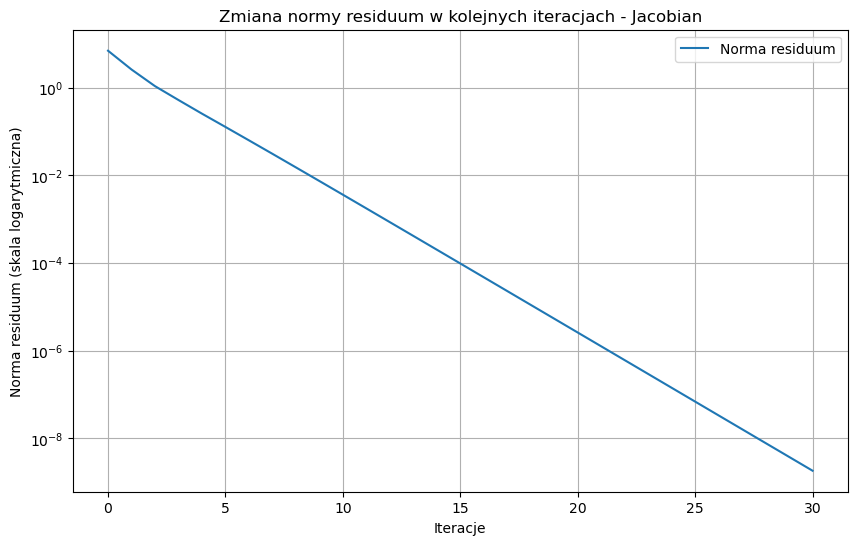

In [13]:
plot_residual_norms(residuals, 'Jacobian')

In [14]:
def gauss_seidel_method(A, b, max_itr=1000, tolerance=1E-9):
    N = len(b)
    x = [1 for _ in range(N)]
    itr = 0
    residuals = []
    err_norm = None
    start = time.time()

    while itr < max_itr:
        x_new = [1 for _ in range(N)]
        for i in range(N):
            sum_left = 0
            for j in range(i):
                sum_left += A[i][j] * x_new[j]
            sum_right = 0
            for j in range(i + 1, N):
                sum_right += A[i][j] * x[j]

            x_new[i] = (b[i] - sum_left - sum_right) / A[i][i]

        residual = [0 for _ in range(N)]
        err_norm = float('-inf')

        for i in range(N):
            sum_Ax = 0
            for j in range(N):
                sum_Ax += A[i][j] * x[j]
            residual[i] = sum_Ax - b[i]
            if abs(residual[i]) > err_norm:
                err_norm = abs(residual[i])

        if err_norm < tolerance:
            break

        x = x_new
        residuals.append(err_norm)
        itr += 1

    return itr, residuals, x, time.time() - start

In [15]:
# Gauss-Seidel method
itr, residuals, x, time_seidel = gauss_seidel_method(A, b)
print("Gauss-Seidel Iterations:", itr)
print("Gauss-Seidel Final Residuum: ", residuals[-1])
print("Gauss-Seidel Time taken: ", time_seidel)

Gauss-Seidel Iterations: 19
Gauss-Seidel Final Residuum:  2.8287718972785925e-09
Gauss-Seidel Time taken:  0.0009915828704833984


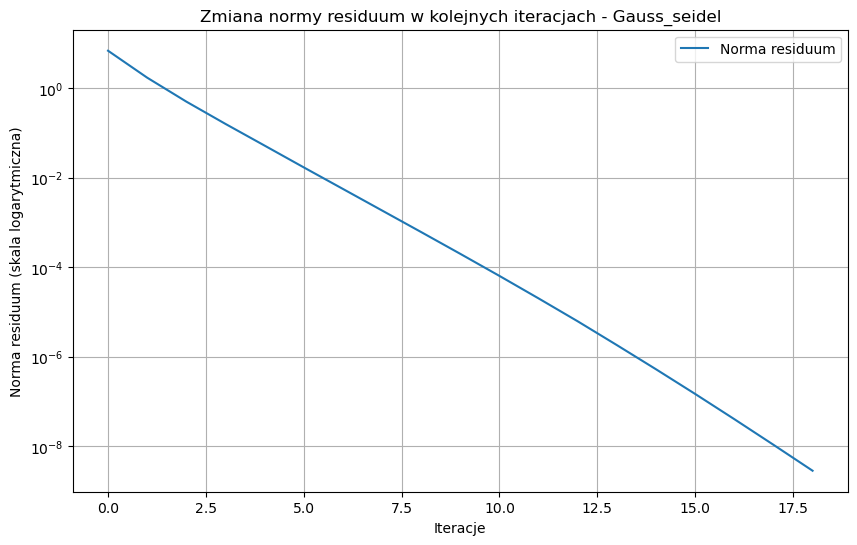

In [16]:
plot_residual_norms(residuals, 'Gauss_seidel')